In [2]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize, rescale

sns.set_style('darkgrid')

In [3]:
def plot_chirps(chirps):
    times = [i for i in range(1024)]

    plt.figure(figsize=(15, 10))

    for channel in range(16):
        plt.plot(times, chirps[channel], label=f'Channel {channel+1}')

    plt.grid(True)
    plt.legend()
    plt.show()


In [4]:
def plot_frame(frame):
    times = [i for i in range(1024*frame.shape[0])]

    plt.figure(figsize=(15, 10))

    for channel_id in range(16):

        plt.plot(times, frame[:, :, channel_id].flatten(), label=f'Channel {channel_id+1}')

    plt.grid(True)
    plt.legend()
    plt.show()


def plot_frame2(frame):
    frame_image = frame[:, 50:, :]
    frame_image = frame_image.flatten().reshape(128, 974*16)
    #frame_image = cv2.resize(frame_image, (64, 64))
    #frame_image = resize(frame_image, (64, 64))
    
    plt.figure(figsize=(5, 2))
    plt.imshow(frame_image, cmap="CMRmap", interpolation='nearest', aspect='auto')
    #plt.imshow(frame_image)
    plt.axis('off')
    plt.show()


def plot_frame3(frame):
    frame_image = frame.flatten().reshape(128, 1024*16)
    #frame_image = cv2.resize(frame_image, (1000, 1000))

    plt.figure(figsize=(10, 10))
    for idx in range(1, 17):
        plt.subplot(4, 4, idx)
        plt.specgram(frame[:, :, idx-1])
    plt.show()

In [5]:
FILE_NAME = 'EXP_17_M'

In [6]:
file = h5py.File(f'../data/real/{FILE_NAME}.h5', 'r')

In [7]:
help(file)

Help on File in module h5py._hl.files object:

class File(h5py._hl.group.Group)
 |  File(name, mode=None, driver=None, libver=None, userblock_size=None, swmr=False, rdcc_nslots=None, rdcc_nbytes=None, rdcc_w0=None, track_order=None, **kwds)
 |  
 |  Represents an HDF5 file.
 |  
 |  Method resolution order:
 |      File
 |      h5py._hl.group.Group
 |      h5py._hl.base.HLObject
 |      h5py._hl.base.CommonStateObject
 |      h5py._hl.base.MutableMappingHDF5
 |      h5py._hl.base.MappingHDF5
 |      collections.abc.MutableMapping
 |      collections.abc.Mapping
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, *args)
 |  
 |  __init__(self, name, mode=None, driver=None, libver=None, userblock_size=None, swmr=False, rdcc_nslots=None, rdcc_nbytes=None, rdcc_w0=None, track_order=None, **kwds)
 |      Creat

In [8]:
def cam_Image(data, frame):
    dbkeys = list(data.keys())

    if dbkeys[0][2] == 'm':
        height = int(data[dbkeys[0]].shape[1])
        width  = int(data[dbkeys[0]].shape[0]/(len(list(data[dbkeys[1]])) * 3))
        im = np.array(data[dbkeys[0]][width*3*frame: width*3*frame +  width*3])
        im = im.flatten()
        _imageFrame = np.array(np.reshape(im, (height, width,3)))
        return _imageFrame
    else:
        print('Cam image not found!')

plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(cam_Image(file, 90), cv2.COLOR_BGR2RGB))

NameError: name 'cv2' is not defined

<Figure size 1440x1080 with 0 Axes>

In [ ]:
len(file['Chn1'])

14464

In [9]:
raw_data = []

for time in range(len(file['Chn1'])):
    frame = []
    for channel in range(1, 17):
        channel_values = file['Chn' + str(channel)][time]
        channel_values[0] = 0
        frame.append(channel_values)
        
    raw_data.append(frame)

raw_data = np.array(raw_data).astype(np.float32)

In [10]:
raw_data.shape

(14464, 16, 1024)

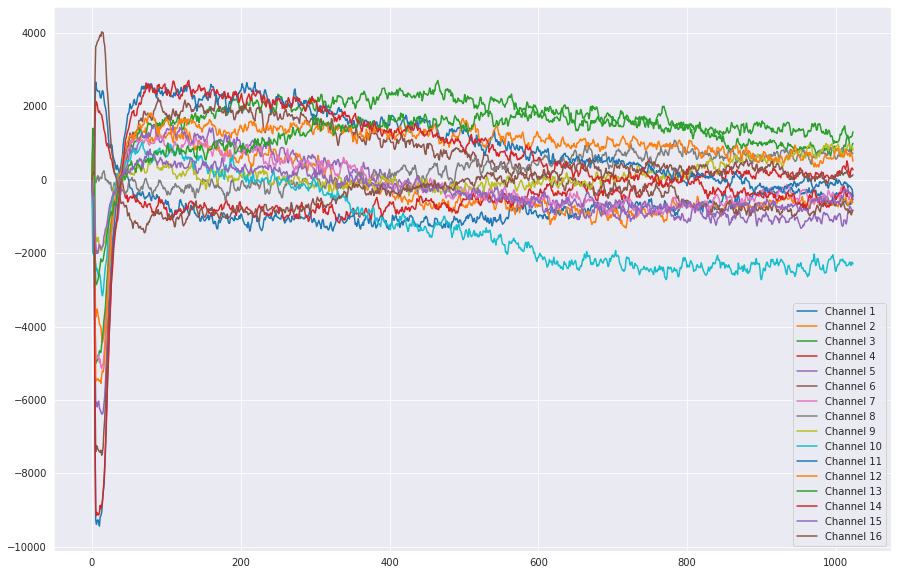

In [11]:
plot_chirps(raw_data[6])

In [12]:
raw_frame_data = []

for idx in range(int(raw_data.shape[0] / 128)):
    raw_frame_data.append(raw_data[idx*128:idx*128+128])

raw_frame_data = np.array(raw_frame_data)

In [13]:
np.save(f'../data/real/{FILE_NAME}_frames.npy', raw_frame_data)
raw_frame_data.shape

(113, 128, 16, 1024)

In [14]:
raw_frame_data = np.swapaxes(raw_frame_data, 2, 3)

In [15]:
raw_frame_data.shape

(113, 128, 1024, 16)

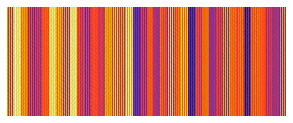

In [17]:
plot_frame2(raw_frame_data[85])

In [47]:
data_min = raw_frame_data.min()
data_max = raw_frame_data.max()

In [48]:
a, b = -1, 1

In [49]:
np.subtract(raw_frame_data, data_min, out=raw_frame_data)
np.multiply(raw_frame_data, (b - a), out=raw_frame_data)
np.divide(raw_frame_data, (data_max - data_min), out=raw_frame_data)
np.add(raw_frame_data, a, out=raw_frame_data)
raw_frame_data

array([[[[-0.00572026, -0.00572026, -0.00572026, ..., -0.00572026,
          -0.00572026, -0.00572026],
         [-0.00286013, -0.00026   ,  0.00390017, ..., -0.04342175,
          -0.03848153,  0.00702024],
         [-0.00884038, -0.00078005,  0.00077999, ..., -0.03744149,
          -0.03900158,  0.00702024],
         ...,
         [-0.04472178, -0.04108167,  0.05460215, ..., -0.03354132,
          -0.03432137,  0.00702024],
         [-0.04316175, -0.04368174,  0.05304217, ..., -0.03354132,
          -0.03848153,  0.00182009],
         [-0.04160166, -0.04212171,  0.05928242, ..., -0.03432137,
          -0.03822154,  0.00832033]],

        [[-0.00572026, -0.00572026, -0.00572026, ..., -0.00572026,
          -0.00572026, -0.00572026],
         [-0.03094125, -0.0356214 ,  0.0603224 , ..., -0.04056162,
          -0.04134166,  0.00884032],
         [-0.03198129, -0.03068125,  0.05720234, ..., -0.03848153,
          -0.04082161,  0.00728035],
         ...,
         [-0.04680187, -0.04186165

In [50]:
print(data_min, data_max)

-15296.0 15472.0


In [51]:
np.save(f'../data/real/{FILE_NAME}_frames_scaled.npy', raw_frame_data)

In [52]:
raw_frame_data.shape

(113, 128, 1024, 16)